In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

In [2]:
os.getcwd()

'/Users/thiam'

In [3]:
# Import the data
path = '/Users/thiam/Downloads/data (2).csv'
data = pd.read_csv(path)

In [4]:
data.head()

,name,collection,recipie_collection_idx,image,descripition,ingredients,steps,Neutretion
0,Chickpea & Potato Curry,collection/vegan-recipes/,1,https://www.tasteofhome.com/wp-content/uploads...,\n\n1\n/\n92\n\n\n\n\n\n\n\nChickpea & Potato ...,"['1 tablespoon canola oil', '1 medium onion, c...","['In a large skillet, heat oil over medium-hig...","<p>1-1/4 cups chickpea mixture: 240 calories, ..."
1,Crispy Tofu with Black Pepper Sauce,collection/vegan-recipes/,2,https://www.tasteofhome.com/wp-content/uploads...,\n\n2\n/\n92\n\n\n\n\n\n\n\n\nCrispy Tofu with...,"['2 tablespoons reduced-sodium soy sauce', '2 ...",['Mix the first 4 ingredients. Mince white par...,"<p>1 cup: 316 calories, 24g fat (2g saturated ..."
2,Over-the-Rainbow Minestrone,collection/vegan-recipes/,3,https://www.tasteofhome.com/wp-content/uploads...,\n\n3\n/\n92\n\n\n\n\n\n\n\nOver-the-Rainbow M...,"['1/2 pound Swiss chard', '2 tablespoons olive...",['Cut stems from chard; chop stems and leaves ...,"<p>1-1/2 cups: 231 calories, 7g fat (1g satura..."
3,Simple Vegetarian Slow-Cooked Beans,collection/vegan-recipes/,4,https://www.tasteofhome.com/wp-content/uploads...,\n\n4\n/\n92\n\n\n\n\n\n\n\nTaste of HomeSimpl...,['4 cans (15-1/2 ounces each) great northern b...,"['In a 3-qt. slow cooker, combine the first 7 ...","<p>3/4 cup: 229 calories, 3g fat (0 saturated ..."
4,Vegetarian Black Bean Pasta,collection/vegan-recipes/,5,https://www.tasteofhome.com/wp-content/uploads...,\n\n5\n/\n92\n\n\n\n\n\n\n\nTaste of HomeVeget...,"['9 ounces uncooked whole wheat fettuccine', '...",['Cook fettuccine according to package directi...,"<p>1-1/4 cups: 255 calories, 3g fat (0 saturat..."


In [5]:
data.info() #provide info about the data -> Number of non null values and variable types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    87 non-null     object
 1   collection              87 non-null     object
 2   recipie_collection_idx  87 non-null     int64 
 3   image                   86 non-null     object
 4   descripition            87 non-null     object
 5   ingredients             87 non-null     object
 6   steps                   87 non-null     object
 7   Neutretion              87 non-null     object
dtypes: int64(1), object(7)
memory usage: 5.6+ KB


In [6]:
data.collection.unique() # this column is dropped since it contains the same entry which is useless.

array(['collection/vegan-recipes/'], dtype=object)

In [13]:
data.drop('collection', axis=1, inplace = True)

In [14]:
data.ingredients.values[0]

"['1 tablespoon canola oil', '1 medium onion, chopped', '2 garlic cloves, minced', '2 teaspoons minced fresh gingerroot', '2 teaspoons ground coriander', '1 teaspoon garam masala', '1 teaspoon chili powder', '1/2 teaspoon salt', '1/2 teaspoon ground cumin', '1/4 teaspoon ground turmeric', '1 can (15 ounces) crushed tomatoes', '2 cans (15 ounces each) chickpeas or garbanzo beans, rinsed and drained', '1 large baking potato, peeled and cut into 3/4-inch cubes', '2-1/2 cups vegetable stock', '1 tablespoon lime juice', 'Chopped fresh cilantro', 'Hot cooked rice', 'Optional: Sliced red onion and lime wedges']"

In [17]:
data.descripition.values[0]

'\n\n1\n/\n92\n\n\n\n\n\n\n\nChickpea & Potato CurryI make chana masala, the classic Indian chickpea curry, in my slow cooker. First browning the onion, ginger and garlic really makes the sauce amazing. —Anjana Devasahayam, San Antonio, TexasGo to Recipe\nYou can also adopt these high protein foods in your day-to-day life for healthier eating habits.\n'

In [19]:
# Define a cleaning function to remove unnecessary characters.
import re
def Cleantext(text):
    clean_text = re.sub(r'[\d/]+', '', text)
    clean_text = re.sub(r'[^A-Za-z]', ' ', clean_text)
    cleant_text = clean_text.replace('\n', '')
    return cleant_text

In [20]:
data.descripition = data.descripition.apply(lambda x: Cleantext(x))

In [21]:
data.descripition

0                 Chickpea   Potato CurryI make chan...
1                  Crispy Tofu with Black Pepper Sau...
2                 Over the Rainbow Minestrone Recipe...
3                 Taste of HomeSimple Vegetarian Slo...
4                 Taste of HomeVegetarian Black Bean...
                            ...                        
82                German Red Cabbage Recipe photo by...
83                Taste of HomeRoasted Rosemary Caul...
84                Grilled Cauliflower WedgesThis sid...
85                Almond Vegetable Stir FryWhile bro...
86                Lentil Tomato SoupDouble the recip...
Name: descripition, Length: 87, dtype: object

In [25]:
# Let's create word cloud to see the most common ingredients for all recipe.
from wordcloud import WordCloud

In [26]:
data.ingredients = data.ingredients.apply(lambda x:Cleantext(x))

In [29]:
data.ingredients

0        tablespoon canola oil     medium onion  cho...
1        tablespoons reduced sodium soy sauce     ta...
2        pound Swiss chard     tablespoons olive oil...
3        cans    ounces each  great northern beans  ...
4        ounces uncooked whole wheat fettuccine     ...
                            ...                        
82       medium onion  halved and sliced     medium ...
83       medium head cauliflower  about   pounds   b...
84       large head cauliflower      teaspoon ground...
85       teaspoon cornstarch     teaspoon sugar     ...
86        cups water     medium carrots  sliced     ...
Name: ingredients, Length: 87, dtype: object

In [31]:
text_data = ''.join(data.ingredients.dropna().astype(str))

In [33]:
text_data = text_data.replace('teaspoon', '')
text_data = text_data.replace('tablespoon', '')
text_data = text_data.replace('cup', '')
text_data = text_data.replace('can', '')
text_data = text_data.replace('ounces', '')
text_data = text_data.replace('chopped', '')
text_data = text_data.replace('minced', '')
text_data = text_data.replace('drained', '')
text_data = text_data.replace('medium', '')

In [35]:
ingredient_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

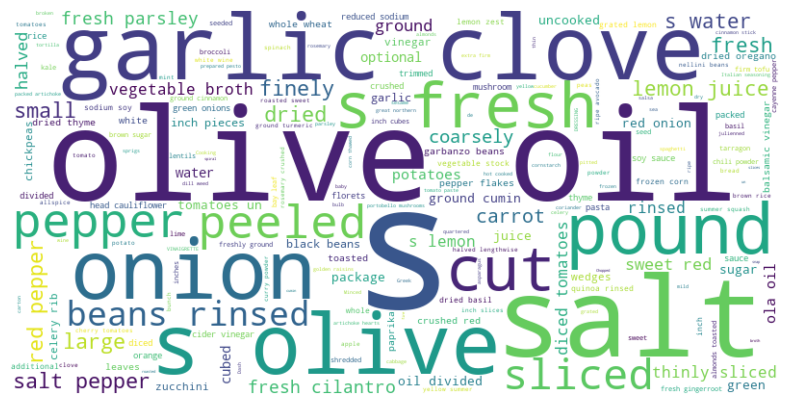

In [36]:
plt.figure(figsize=(10, 5))
plt.imshow(ingredient_wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

Here we can notice that Olive oil, Salt, garlic, pepper, oignons,beans, and many fresh ingredients are the most common ingredients used in Vegan recipe.

In [38]:
data.Neutretion = data.Neutretion.apply(lambda x: x.split(':')[1])

In [39]:
data.Neutretion.values[0].split(',')

[' 240 calories',
 ' 6g fat (0 saturated fat)',
 ' 0 cholesterol',
 ' 767mg sodium',
 ' 42g carbohydrate (8g sugars',
 ' 9g fiber)',
 ' 8g protein. </p>']

In [40]:
# Split the Neutretion column into several columns to extract the nutrients (calory, protein etc) values into columns.
list_of_new_colums = list()
for value in data.Neutretion.values[0].split(','):
     list_of_new_colums.append(f'Neutretion_{value}')

In [46]:
for i, name in enumerate(list_of_new_colums):
        data[name] = data.Neutretion.apply(lambda x: x.split(',')[i])

In [48]:
data.head(2)

,name,recipie_collection_idx,image,descripition,ingredients,steps,Neutretion,Neutretion_ 240 calories,Neutretion_ 6g fat (0 saturated fat),Neutretion_ 0 cholesterol,Neutretion_ 767mg sodium,Neutretion_ 42g carbohydrate (8g sugars,Neutretion_ 9g fiber),Neutretion_ 8g protein. </p>
0,Chickpea & Potato Curry,1,https://www.tasteofhome.com/wp-content/uploads...,Chickpea Potato CurryI make chan...,tablespoon canola oil medium onion cho...,"['In a large skillet, heat oil over medium-hig...","240 calories, 6g fat (0 saturated fat), 0 cho...",240 calories,6g fat (0 saturated fat),0 cholesterol,767mg sodium,42g carbohydrate (8g sugars,9g fiber),8g protein. </p>
1,Crispy Tofu with Black Pepper Sauce,2,https://www.tasteofhome.com/wp-content/uploads...,Crispy Tofu with Black Pepper Sau...,tablespoons reduced sodium soy sauce ta...,['Mix the first 4 ingredients. Mince white par...,"316 calories, 24g fat (2g saturated fat), 0 c...",316 calories,24g fat (2g saturated fat),0 cholesterol,583mg sodium,20g carbohydrate (8g sugars,2g fiber),7g protein. </p>


In [50]:
data['satured_fat(g)'] = data['Neutretion_ 6g fat (0 saturated fat)'].apply(lambda x: x.split(' ')[3])
data['satured_fat(g)']

0      (0
1     (2g
2     (1g
3      (0
4      (0
     ... 
82     (0
83    (1g
84    (1g
85    (1g
86     (0
Name: satured_fat(g), Length: 87, dtype: object

In [52]:
data['sugar(g)'] = data['Neutretion_ 42g carbohydrate (8g sugars'].apply(lambda x: x.split(' ')[3])
data['sugar(g)']

0      (8g
1      (8g
2      (7g
3      (2g
4      (4g
      ... 
82    (12g
83     (2g
84     (2g
85      (0
86     (9g
Name: sugar(g), Length: 87, dtype: object

In [54]:
# Renaming of the columns
data.columns= ['name', 'recipie_collection_idx', 'image', 'descripition',
       'ingredients', 'steps', 'Neutretion',
    'calory', 'fat(g)', 'cholesterol', 'sodium(mg)','carbohydrate(g)', 'fiber(g)', 'protein(g)','satured_fat(g)',
      'sugar(g)'] 

In [55]:
# Clean the columns to remain with numerical values
data['calory'] = data['calory'].apply(lambda x: re.sub("[^0-9]",'', x))
data['fat(g)'] = data['fat(g)'].apply(lambda x: re.sub("[^0-9]",'', x))
data['cholesterol'] = data['cholesterol'].apply(lambda x: re.sub("[^0-9]",'', x))
data['sodium(mg)'] = data['sodium(mg)'].apply(lambda x: re.sub("[^0-9]",'', x))
data['fiber(g)'] = data['fiber(g)'].apply(lambda x: re.sub("[^0-9]",'', x))
data['carbohydrate(g)'] = data['carbohydrate(g)'].apply(lambda x: re.sub("[^0-9]",'', x))
data['protein(g)'] = data['protein(g)'].apply(lambda x: re.sub("[^0-9]",'', x))
data['satured_fat(g)'] = data['satured_fat(g)'].apply(lambda x: re.sub("[^0-9]",'', x))
data['sugar(g)'] = data['sugar(g)'].apply(lambda x: re.sub("[^0-9]",'', x))

In [56]:
# Drop the Neutretion column since there is no longer necessary useful information
data.drop('Neutretion', axis=1, inplace=True)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    87 non-null     object
 1   recipie_collection_idx  87 non-null     int64 
 2   image                   86 non-null     object
 3   descripition            87 non-null     object
 4   ingredients             87 non-null     object
 5   steps                   87 non-null     object
 6   calory                  87 non-null     object
 7   fat(g)                  87 non-null     object
 8   cholesterol             87 non-null     object
 9   sodium(mg)              87 non-null     object
 10  carbohydrate(g)         87 non-null     object
 11  fiber(g)                87 non-null     object
 12  protein(g)              87 non-null     object
 13  satured_fat(g)          87 non-null     object
 14  sugar(g)                87 non-null     object
dtypes: int64

In [62]:
# Convert string to float
data[['calory', 'fat(g)', 'cholesterol','sodium(mg)','carbohydrate(g)','fiber(g)','protein(g)','satured_fat(g)','sugar(g)']] = data[['calory', 'fat(g)', 'cholesterol','sodium(mg)', 
'carbohydrate(g)','fiber(g)','protein(g)','satured_fat(g)','sugar(g)']].apply(lambda x: x.astype(float))

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    87 non-null     object 
 1   recipie_collection_idx  87 non-null     int64  
 2   image                   86 non-null     object 
 3   descripition            87 non-null     object 
 4   ingredients             87 non-null     object 
 5   steps                   87 non-null     object 
 6   calory                  87 non-null     float64
 7   fat(g)                  87 non-null     float64
 8   cholesterol             87 non-null     float64
 9   sodium(mg)              87 non-null     float64
 10  carbohydrate(g)         87 non-null     float64
 11  fiber(g)                87 non-null     float64
 12  protein(g)              87 non-null     float64
 13  satured_fat(g)          87 non-null     float64
 14  sugar(g)                87 non-null     floa

In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
recipie_collection_idx,87.0,46.597701,27.130374,1.0,23.5,47.0,69.5,92.0
calory,87.0,205.597701,113.027107,15.0,110.5,194.0,284.5,475.0
fat(g),87.0,71.896552,53.138922,0.0,40.0,61.0,101.0,242.0
cholesterol,87.0,0.114943,0.881664,0.0,0.0,0.0,0.0,8.0
sodium(mg),87.0,449.367816,285.161730,4.0,221.0,403.0,640.5,1385.0
carbohydrate(g),87.0,994.229885,1814.549535,30.0,132.5,312.0,517.5,7610.0
fiber(g),87.0,5.517241,3.681702,0.0,2.5,5.0,9.0,15.0
protein(g),87.0,6.724138,4.850533,0.0,2.0,5.0,11.0,21.0
satured_fat(g),87.0,0.862069,0.765118,0.0,0.0,1.0,1.0,3.0
sugar(g),87.0,6.413793,5.560558,0.0,2.0,6.0,9.0,37.0


This Vegan recipe sample present a high content of carbohydrate, fat and calory and a low content of fiber, protein, satured fat and sugar; and zero cholesterol considering to the mean and the median values

<Axes: >

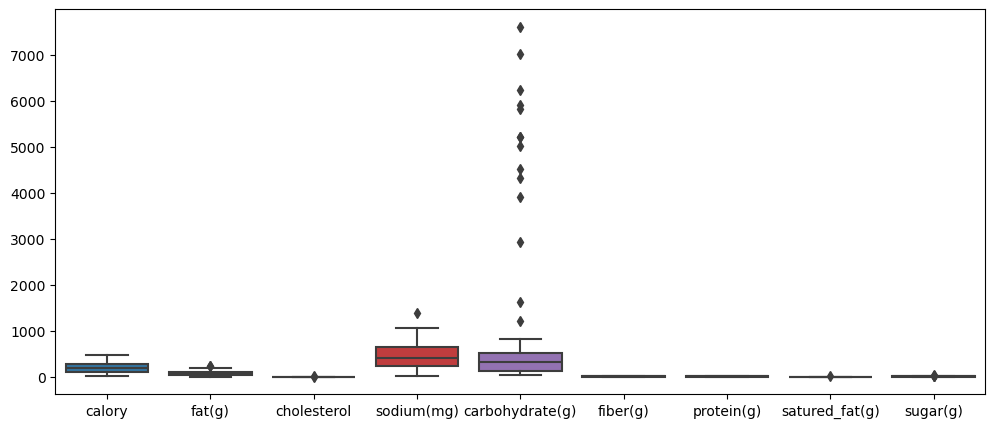

In [69]:
plt.figure(figsize=(12, 5))
sns.boxplot(data= data.select_dtypes(float))

The boxplot indicates that some recipes have very high content of carbohydrate than most of them.

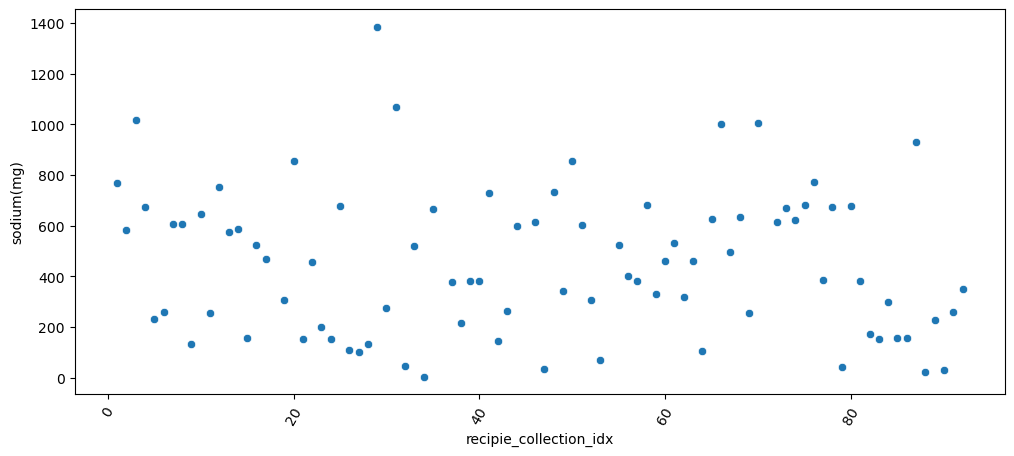

In [71]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='recipie_collection_idx', y='sodium(mg)', data=data)
plt.xticks(rotation=60)
plt.show()

Let's check the recipe with highest element contents

In [75]:
for element in ['calory', 'fat(g)', 'cholesterol','sodium(mg)','carbohydrate(g)','fiber(g)','protein(g)','satured_fat(g)','sugar(g)']:
    high_element = data['name'].at[data[element].idxmax()]
    print(f'The repcipe with the highest {element} ({data[element].at[data[element].idxmax()]}) content is {high_element}')

The repcipe with the highest calory (475.0) content is Minted Rice with Garbanzo Curry
The repcipe with the highest fat(g) (242.0) content is Crispy Tofu with Black Pepper Sauce
The repcipe with the highest cholesterol (8.0) content is Pesto Gnocchi
The repcipe with the highest sodium(mg) (1385.0) content is Southwest Vegetarian Lentil Soup
The repcipe with the highest carbohydrate(g) (7610.0) content is Lemony Chickpeas
The repcipe with the highest fiber(g) (15.0) content is Hearty Vegetable Split Pea Soup
The repcipe with the highest protein(g) (21.0) content is Tofu Chow Mein
The repcipe with the highest satured_fat(g) (3.0) content is Avocado Fruit Salad with Tangerine Vinaigrette
The repcipe with the highest sugar(g) (37.0) content is Maple-Walnut Sweet Potatoes


##### Sort the recipes by Protein content in descending order to check the top recipes with high protein content.

In [78]:
data_protein = data.sort_values(by= 'protein(g)' , ascending=False)[['name','protein(g)']]

Let's check the recipes that contain up to 10g of protein.

In [80]:
data_protein[data_protein['protein(g)']>=10].count()/87

name          0.287356
protein(g)    0.287356
dtype: float64

28% of the recipes contain over 10g of protein.

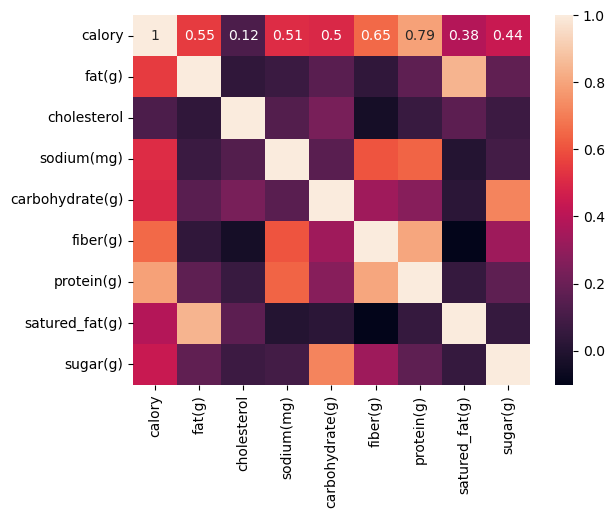

In [84]:
sns.heatmap(data.select_dtypes(float).corr(), annot =True)
plt.show()

There is a high correlation between calory and protein, and also between sugar and carbohydrate. Recipes with high protein content can provide high calories, it is the same like carbohydrate and sugar.

In [87]:
data['steps'].values[1]

"['Mix the first 4 ingredients. Mince white parts of green onions; thinly slice green parts.', '   Cut tofu into 1/2-in. cubes; pat dry with paper towels. Toss tofu with cornstarch. In a large skillet, heat 4 tablespoons oil over medium-high heat. Add tofu; cook until crisp and golden brown, 5-7 minutes, stirring occasionally. Remove from pan; drain on paper towels.', '   In same pan, heat 1 tablespoon oil over medium-high heat. Add peas; stir-fry until crisp-tender, 2-3 minutes. Remove from pan.', '   In same pan, heat remaining 1 tablespoon oil over medium-high heat. Add pepper; cook 30 seconds. Add garlic, ginger and minced green onions; stir-fry for 30-45 seconds. Stir in soy sauce mixture; cook and stir until slightly thickened. Remove from heat; stir in tofu and peas. Sprinkle with sliced green onions.']"

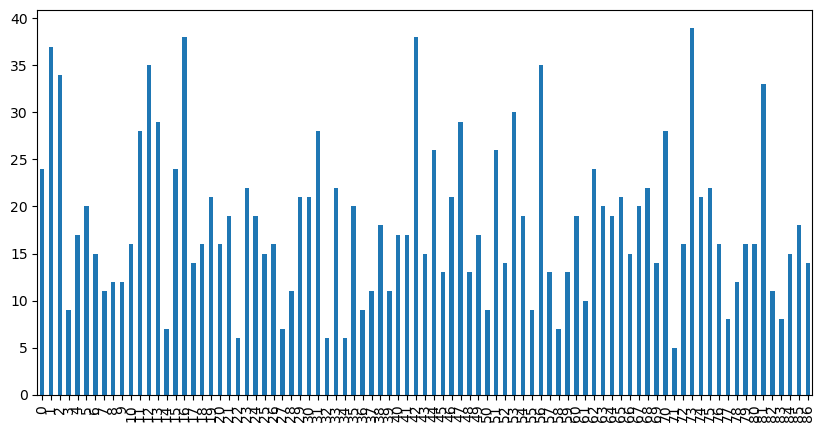

In [89]:
plt.figure(figsize=(10,5))
pattern = r'[.,;]+'
data['steps'].apply(lambda x: len(re.split(pattern, x))).plot(kind='bar')
plt.show()

In [91]:
#Add the recipe number of preparation steps column in the data.
data['number_of_steps'] = data['steps'].apply(lambda x: len(re.split(pattern, x)))

The recipes with the shortest steps are recipe n°22, 32, 34, and n°71, let's see which recipe they are.

In [94]:
x= list()
for i in [22,32,34,71]:
    x.append(data['name'].at[i])
print(f'Recipes with shortest preparation time are {x}')

Recipes with shortest preparation time are ['Avocado Fruit Salad with Tangerine Vinaigrette', 'Fresh Corn & Avocado Dip', 'Tomato & Avocado Sandwiches', 'Easy Gazpacho']


Let's check there elements contents

In [97]:
for element in ['calory', 'fat(g)', 'cholesterol','sodium(mg)','carbohydrate(g)','fiber(g)','protein(g)','satured_fat(g)','sugar(g)']:
    high_element = data[element].at[22]
    print(f'{element} : {high_element}')

calory : 321.0
fat(g) : 233.0
cholesterol : 0.0
sodium(mg) : 154.0
carbohydrate(g) : 2920.0
fiber(g) : 8.0
protein(g) : 3.0
satured_fat(g) : 3.0
sugar(g) : 20.0


In [99]:
for element in ['calory', 'fat(g)', 'cholesterol','sodium(mg)','carbohydrate(g)','fiber(g)','protein(g)','satured_fat(g)','sugar(g)']:
    high_element = data[element].at[32]
    print(f'{element} : {high_element}')

calory : 52.0
fat(g) : 30.0
cholesterol : 0.0
sodium(mg) : 4.0
carbohydrate(g) : 62.0
fiber(g) : 1.0
protein(g) : 1.0
satured_fat(g) : 0.0
sugar(g) : 2.0


In [101]:
for element in ['calory', 'fat(g)', 'cholesterol','sodium(mg)','carbohydrate(g)','fiber(g)','protein(g)','satured_fat(g)','sugar(g)']:
    high_element = data[element].at[34]
    print(f'{element} : {high_element}')

calory : 278.0
fat(g) : 112.0
cholesterol : 0.0
sodium(mg) : 379.0
carbohydrate(g) : 356.0
fiber(g) : 9.0
protein(g) : 11.0
satured_fat(g) : 2.0
sugar(g) : 6.0


In [103]:
for element in ['calory', 'fat(g)', 'cholesterol','sodium(mg)','carbohydrate(g)','fiber(g)','protein(g)','satured_fat(g)','sugar(g)']:
    high_element = data[element].at[71]
    print(f'{element} : {high_element}')

calory : 146.0
fat(g) : 112.0
cholesterol : 0.0
sodium(mg) : 387.0
carbohydrate(g) : 118.0
fiber(g) : 2.0
protein(g) : 2.0
satured_fat(g) : 2.0
sugar(g) : 8.0


The four timeless preparation recipes are not rich in protein and fibers except the 'Tomato & Avocado Sandwiches' that healthy according to the data since both of them have less proteins, and fibers. Its sugar content is reasonable compared to others. 

In [106]:
longest_recipe2 = data['name'].at[73]

In [108]:
longest_recipe2

'Spiced Pickled Beets'

In [110]:
for element in ['calory', 'fat(g)', 'cholesterol','sodium(mg)','carbohydrate(g)','fiber(g)','protein(g)','satured_fat(g)','sugar(g)']:
    high_element = data[element].at[73]
    print(f'{element} : {high_element}')

calory : 53.0
fat(g) : 0.0
cholesterol : 0.0
sodium(mg) : 44.0
carbohydrate(g) : 1211.0
fiber(g) : 1.0
protein(g) : 1.0
satured_fat(g) : 0.0
sugar(g) : 11.0


This long step recipe is poor in protein and fiber and has high quantity of sodium but high carbohydrate content.

In [333]:
# Export the clean data to be used in Tableau dashboard
data.to_excel('Vegan Recipe Data.xlsx')

*-----  -> [Here the link to the Tableau dashboard] (https://public.tableau.com/views/VeganRecipesDashboard/Tableaudebord1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link)
------